Mashable (www.mashable.com) -- is a global, multi-platform media and entertainment company. Powered by its own proprietary technology, Mashable is the go-to source for tech, digital culture and entertainment content for its dedicated and influential audience around the globe.

Just like any other media company its success depends on the popularity of articles. And one of the key metrics to measure popularity is no. of shares done on article.
Over period of few years Mashable has collected data on around 40,000 articles.

You as ML expert have to do analysis and modeling to predict number of shares of an article given the input parameters.

https://archive.ics.uci.edu/dataset/332/online+news+popularity

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("542_proj_dataset_1_v1.0\OnlineNewsPopularity.csv")
#df = df.drop(df[df["shares"] > 400000].index, axis = 0)
df = df.drop(["url"], axis = 1)
df["shares_log"] = np.log1p(df['shares'])
df = df[(df["shares_log"] > 5.5) & (df["shares_log"] < 9.1)]
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,shares_log
count,36873.000000,36873.000000,36873.000000,36873.000000,36873.000000,36873.000000,36873.000000,36873.000000,36873.000000,36873.000000,...,36873.000000,36873.000000,36873.000000,36873.000000,36873.000000,36873.000000,36873.000000,36873.000000,36873.000000,36873.000000
mean,353.734142,10.400076,548.203320,0.549675,0.999892,0.691465,10.722697,3.315461,4.416782,1.212513,...,0.755934,-0.258209,-0.520069,-0.107157,0.278910,0.070045,0.341784,0.153505,1964.770971,7.331510
std,214.953057,2.110349,467.498642,3.650340,5.423900,3.384890,11.080615,3.858891,8.168512,4.001840,...,0.246373,0.126798,0.289717,0.094631,0.321996,0.261874,0.189043,0.223428,1614.053542,0.679524
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,245.000000,5.505332
25%,163.000000,9.000000,249.000000,0.470939,1.000000,0.626536,4.000000,1.000000,1.000000,0.000000,...,0.600000,-0.326190,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,928.000000,6.834109
50%,337.000000,10.000000,413.000000,0.538653,1.000000,0.690647,7.000000,3.000000,1.000000,0.000000,...,0.800000,-0.251595,-0.500000,-0.100000,0.125000,0.000000,0.500000,0.000000,1400.000000,7.244942
75%,542.000000,12.000000,718.000000,0.607330,1.000000,0.754386,13.000000,4.000000,4.000000,1.000000,...,1.000000,-0.185737,-0.300000,-0.050000,0.500000,0.136364,0.500000,0.250000,2400.000000,7.783641
max,731.000000,23.000000,7764.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,75.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,8900.000000,9.093919


In [3]:
X = df.drop(["timedelta", "n_tokens_content", "n_unique_tokens","n_non_stop_words","n_non_stop_unique_tokens", "num_self_hrefs","kw_min_min","kw_min_max","LDA_00", "global_sentiment_polarity","global_rate_positive_words", "min_positive_polarity","abs_title_subjectivity","shares", "shares_log"], axis = 1)
#X = df[["num_hrefs", "data_channel_is_world","kw_max_avg", "kw_avg_avg", "self_reference_min_shares", "self_reference_max_shares","self_reference_avg_sharess", "LDA_02", "LDA_03"]]
#X = df.drop(["shares", "shares_log"], axis = 1)
#X = df[["data_channel_is_lifestyle", "data_channel_is_entertainment", "data_channel_is_bus", "data_channel_is_socmed", "data_channel_is_tech", "data_channel_is_world"]]
y = df["shares_log"]


<Axes: >

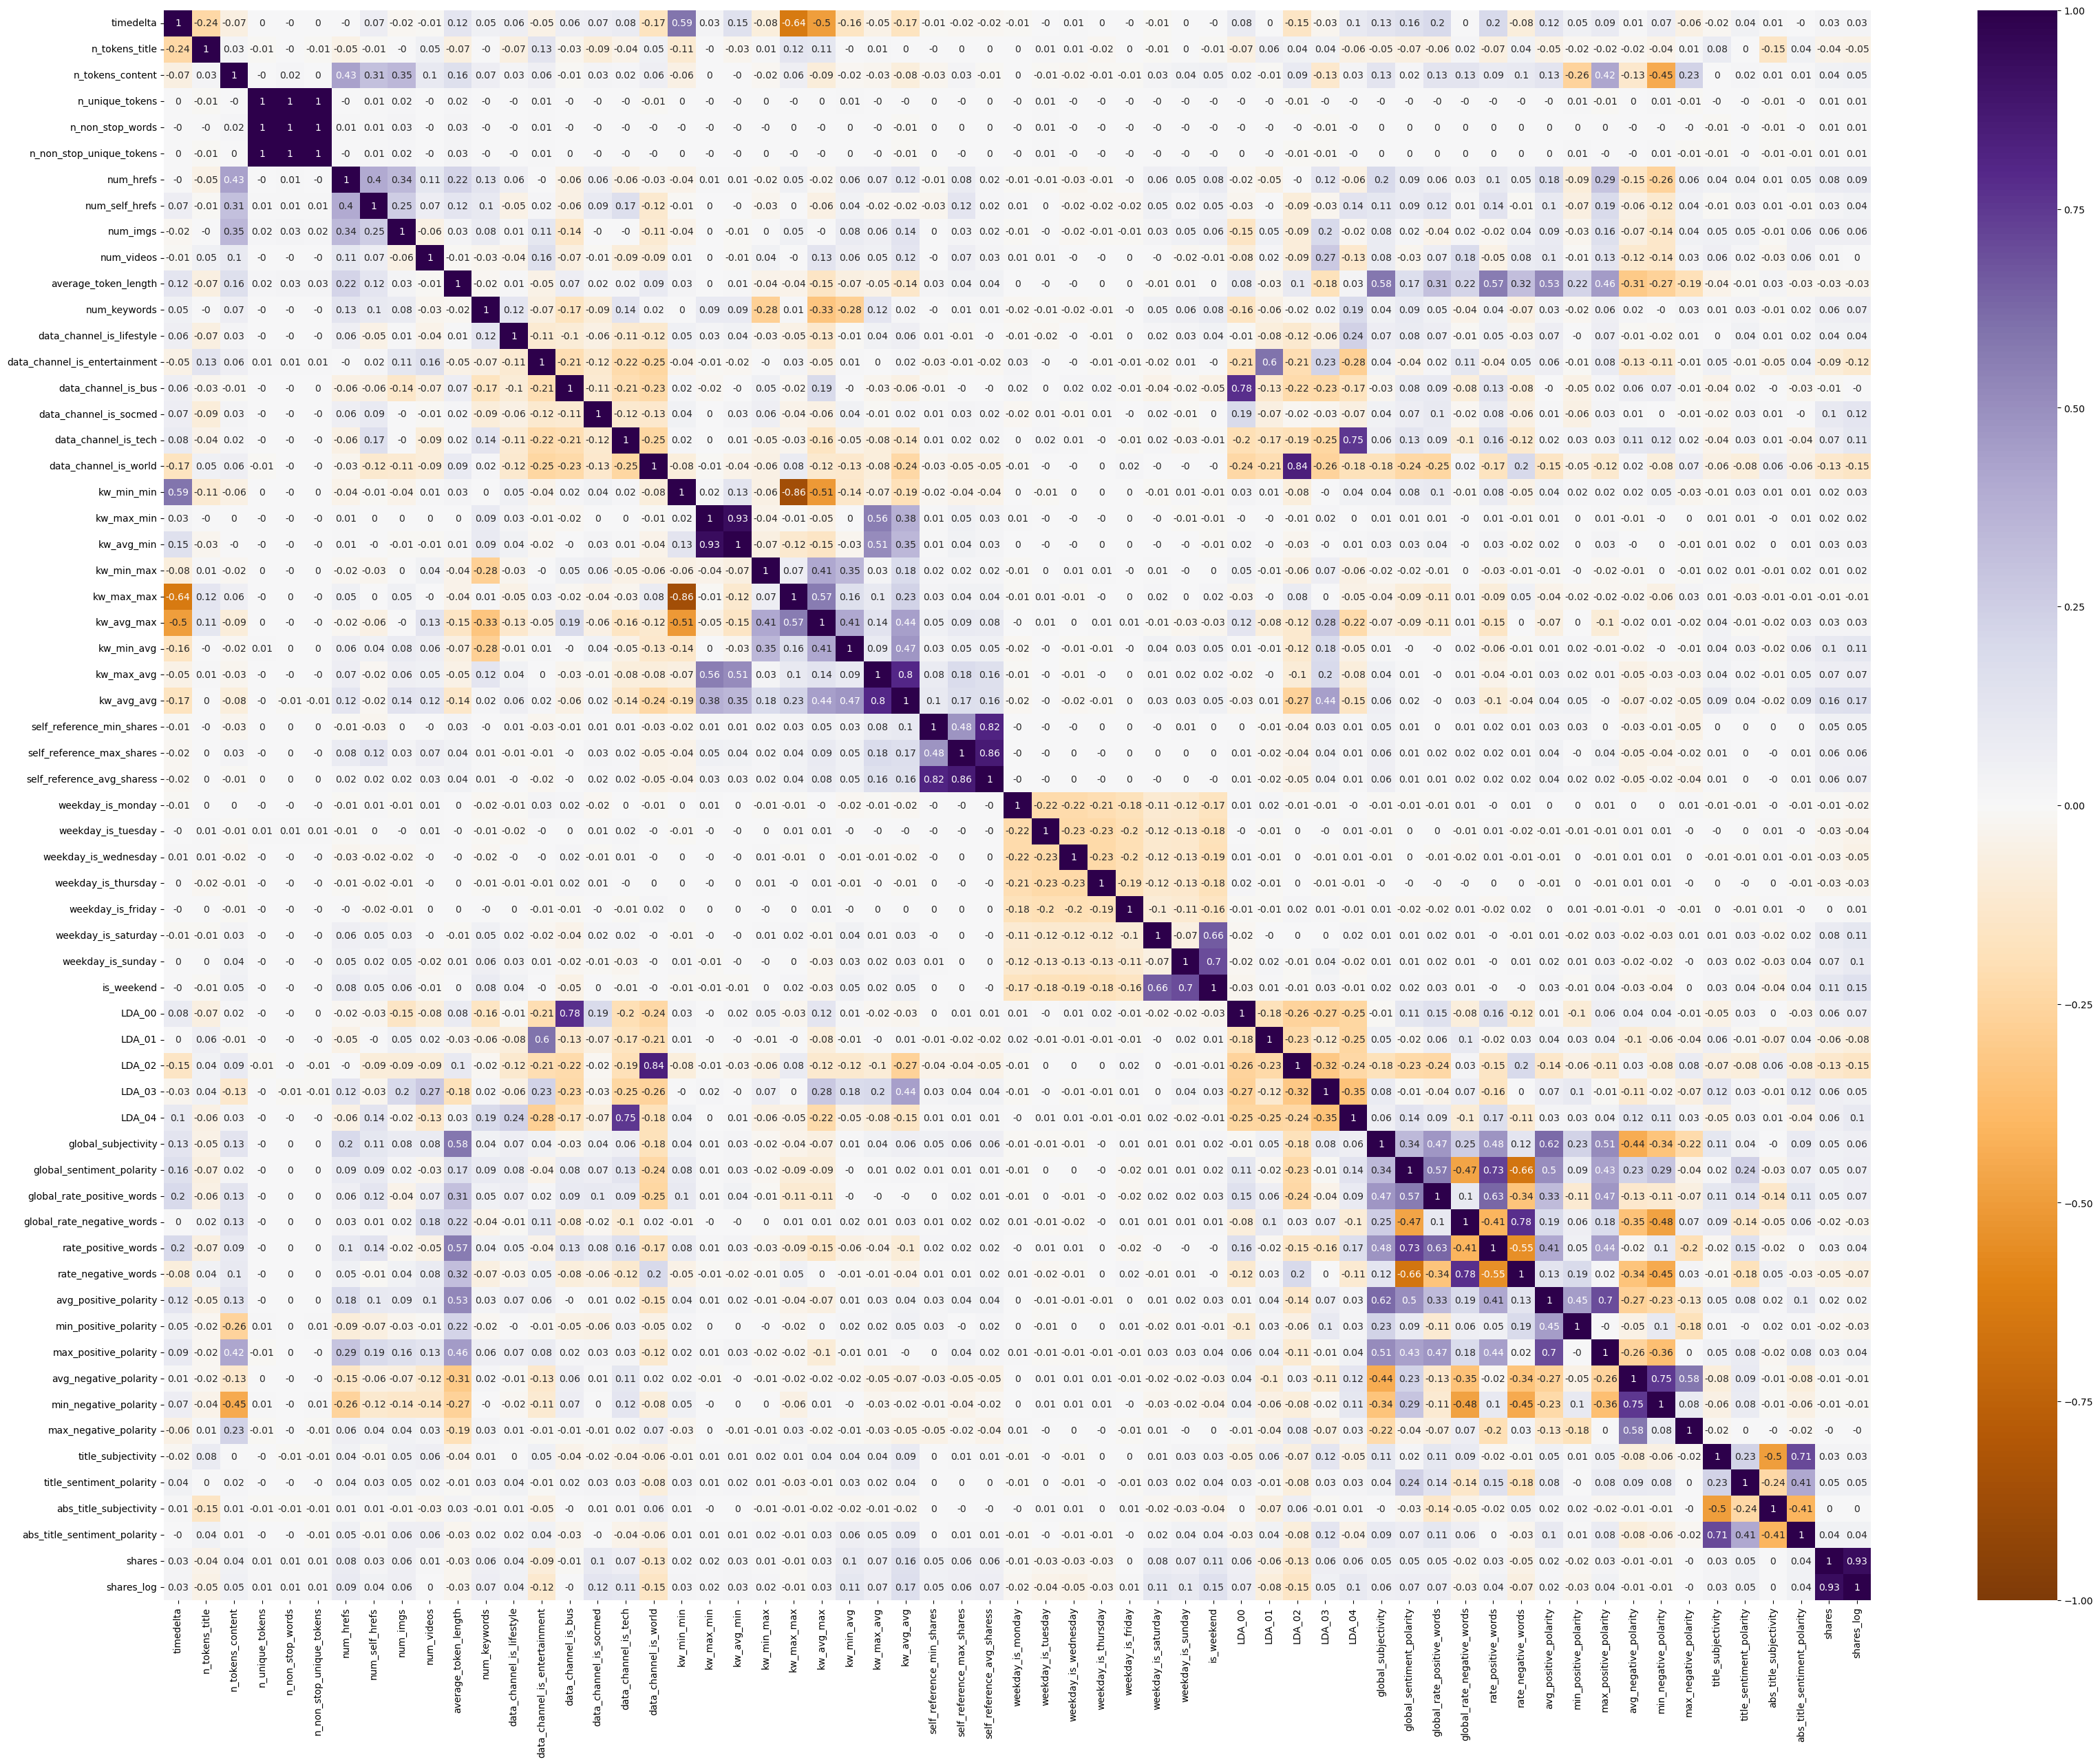

In [4]:
corr = df.corr().round(2)
plt.figure(figsize=(40,30))
sns.heatmap(corr, cmap="PuOr", annot=True, vmin=-1, vmax=1, center=0)

In [200]:
from sklearn.preprocessing import StandardScaler
ssObject = StandardScaler()
X_scaled = ssObject.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,n_tokens_title,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,...,rate_positive_words,rate_negative_words,avg_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_sentiment_polarity
0,0.758143,-0.606716,-0.418293,-0.302993,0.151045,-1.157637,-0.234631,2.144457,-0.441109,-0.249142,...,0.452101,-0.364454,0.248370,-0.227034,-0.723929,-0.275896,-0.981125,0.686635,-0.983483,0.152152
1,-0.663442,-0.696965,-0.418293,-0.302993,0.433539,-1.680783,-0.234631,-0.466319,2.267016,-0.249142,...,0.261687,-0.133938,-0.641987,-0.227034,1.099868,1.363655,0.075630,-0.866201,-0.267481,-0.687056
2,-0.663442,-0.696965,-0.418293,-0.302993,-0.196383,-0.634491,-0.234631,-0.466319,2.267016,-0.249142,...,0.918422,-0.928982,1.386018,0.990647,-1.644042,-0.966234,-0.276621,-0.866201,-0.267481,-0.687056
3,-0.663442,-0.155472,-0.418293,-0.302993,-0.182424,-0.111346,-0.234631,2.144457,-0.441109,-0.249142,...,-0.091940,0.294162,0.319511,0.178859,-0.879273,-0.275896,-0.628873,-0.866201,-0.267481,-0.687056
4,1.232005,0.747018,1.907744,-0.302993,0.154036,-0.111346,-0.234631,-0.466319,-0.441109,-0.249142,...,0.934718,-0.948711,0.563765,0.990647,0.299824,0.069272,0.604008,0.545468,0.253248,-0.076723


In [201]:
from sklearn.model_selection import train_test_split

In [202]:
train_X, test_X, train_y, test_y = train_test_split(X_scaled, y, test_size=0.3)

In [203]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [204]:
lrobj = LinearRegression()

In [205]:
lrobj.fit(train_X, train_y)

LinearRegression()

In [206]:
pred_y = lrobj.predict(test_X)
pred_y[:5]

array([7.29565784, 7.03850688, 7.88295283, 7.44604248, 7.68248716])

In [207]:
mean_absolute_error(np.expm1(test_y), np.expm1(pred_y))

992.993053385841

In [208]:
mean_squared_error(np.expm1(test_y), np.expm1(pred_y))

2852435.3381740386

In [196]:
lrobj.score(test_X, test_y)

0.12726979526830484

In [194]:
error_table = pd.DataFrame({"test_y":np.expm1(test_y), "pred_y": np.expm1(pred_y)})
error_table["error"] = error_table["test_y"]-error_table["pred_y"]
error_table.head(5)

,test_y,pred_y,error
32372,783.0,1861.359464,-1078.359464
32020,1300.0,1391.751101,-91.751101
37124,2100.0,1448.446692,651.553308
6334,8600.0,1414.584809,7185.415191
17208,2200.0,1506.206081,693.793919


In [184]:
error_table.describe()

,test_y,pred_y,error
count,11062.000000,11062.000000,11062.000000
mean,1986.096637,1579.184007,406.912630
std,1635.679564,486.322927,1583.785711
min,245.000000,602.658253,-19118.784149
25%,931.000000,1253.909782,-526.461550
50%,1400.000000,1507.702616,-129.827262
75%,2400.000000,1794.141085,707.262762
max,8900.000000,22118.784149,7808.911020


In [185]:
probj = PolynomialFeatures(degree=2)

In [186]:
transformed_train_X = probj.fit_transform(train_X)

In [187]:
transformed_test_X = probj.fit_transform(test_X)

In [188]:
lrobj_poly = LinearRegression()

In [189]:
lrobj_poly.fit(transformed_train_X, train_y)

LinearRegression()

In [190]:
pred_y_poly = lrobj_poly.predict(transformed_test_X)
pred_y_poly

array([7.58662134, 7.22111073, 7.0479305 , ..., 6.84249046, 6.85076731,
       7.52867253])

In [191]:
lrobj_poly.

SyntaxError: invalid syntax (897354510.py, line 1)

In [192]:
mean_absolute_error(test_y, pred_y_poly)

3963.5607303492766

In [193]:
mean_squared_error(test_y, pred_y)

0.41057376353310854

In [321]:
df = pd.read_csv("542_proj_dataset_1_v1.0\OnlineNewsPopularity.csv")
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [322]:
#X_new = df.drop(["url", "timedelta", "n_tokens_content", "n_unique_tokens","n_non_stop_words","n_non_stop_unique_tokens", "num_self_hrefs","kw_min_min","kw_min_max","LDA_00", "global_sentiment_polarity","global_rate_positive_words", "min_positive_polarity","abs_title_subjectivity","shares"], axis = 1)

#X_new = df[["num_hrefs", "data_channel_is_world","kw_max_avg", "kw_avg_avg", "self_reference_min_shares", "self_reference_max_shares","self_reference_avg_sharess", "LDA_02", "LDA_03"]]
X_new = df[["LDA_03"]]
y = df["shares"]

In [323]:
train_X_new, test_X_new, train_y, test_y = train_test_split(X_new, y, test_size=0.3)

In [324]:
lrobj_new = LinearRegression()
lrobj_new.fit(train_X_new, train_y)

LinearRegression()

In [325]:
mean_absolute_error(test_y, lrobj_new.predict(test_X_new))

3153.955871355826

In [326]:
mean_squared_error(test_y, lrobj_new.predict(test_X_new))

90360633.78164685

In [327]:
probj_new = PolynomialFeatures(degree=3)

In [328]:
transformed_train_X_new = probj.fit_transform(train_X_new)
transformed_test_X_new = probj.fit_transform(test_X_new)

In [329]:
lrobj_new = LinearRegression()
lrobj_new.fit(transformed_train_X_new, train_y)

LinearRegression()

In [330]:
mean_absolute_error(test_y, lrobj_new.predict(transformed_test_X_new))

3153.3008541771446

In [331]:
error_table = pd.DataFrame({"test_y":test_y, "pred_y": lrobj_new.predict(transformed_test_X_new)})
error_table["error"] = error_table["test_y"]-error_table["pred_y"]
error_table

,test_y,pred_y,error
32253,1000,4830.659016,-3830.659016
228,1200,4286.048388,-3086.048388
7368,1600,2680.157289,-1080.157289
31322,916,5040.406152,-4124.406152
38645,2000,2720.986125,-720.986125
...,...,...,...
32007,436,2720.989194,-2284.989194
39235,1200,2793.661091,-1593.661091
35289,1500,2856.455483,-1356.455483
16474,1400,2681.322418,-1281.322418


<Axes: ylabel='error'>

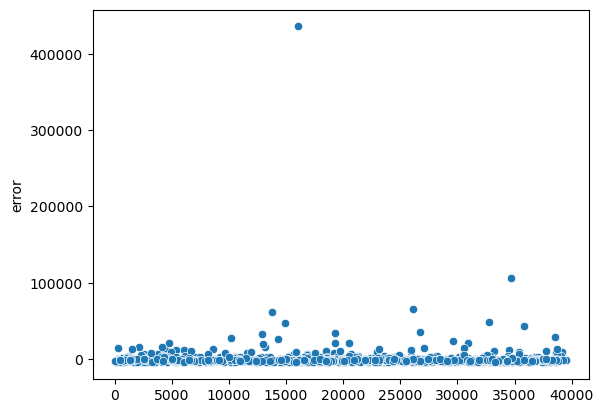

In [332]:
sns.scatterplot(error_table["error"][:1000])

In [369]:
val = error_table[(error_table["error"]<1000) & (error_table["error"]> -1000)]

In [370]:
val.describe()

,test_y,pred_y,error
count,2100.000000,2100.000000,2100.000000
mean,2786.904762,3040.845354,-253.940592
std,919.387776,696.650319,547.417338
min,1700.000000,2653.919629,-999.582172
25%,2000.000000,2698.036341,-721.158877
50%,2600.000000,2727.097282,-358.942831
75%,3300.000000,2856.301023,143.697564
max,6000.000000,5041.992873,993.738424


In [371]:
test_y.describe()

count     11894.000000
mean       3341.226417
std        9570.704512
min          23.000000
25%         939.000000
50%        1400.000000
75%        2700.000000
max      441000.000000
Name: shares, dtype: float64